## Event-based simulation of the $M/G/1$ queue

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def t_mean_confidence_interval(data,alpha):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = stats.t.ppf(1-alpha/2, n-1)*se
    return m, m-h, m+h

Average # of customers in system: 1.69452266934


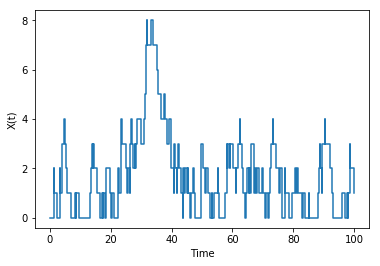

In [3]:
# Event-based simulation of the M/G/1 queue
# Generate a single sample path

# Input parameters
MeanST = 0.8
MeanTBA = 1.0
RunTime = 100

def EndSim():
    global Area
    Area = Area + Slast * (clock - Tlast)

def Arrival():
    global X
    global Slast
    global Tlast
    global Area
    global NextArrival
    global NextDeparture

    X += 1
    NextArrival = clock + np.random.exponential(MeanTBA)
    if X == 1:
        NextDeparture = clock + np.sum(np.random.exponential(MeanST/3,3))
    Area = Area + Slast * (clock - Tlast)
    Slast = X
    Tlast = clock

def Departure():
    global X
    global Slast
    global Tlast
    global Area
    global NextArrival
    global NextDeparture

    X -= 1
    if X > 0:
        NextDeparture = clock + np.sum(np.random.exponential(MeanST/3,3))
    else:
        NextDeparture = float('inf')
    Area = Area + Slast * (clock - Tlast)
    Slast = X
    Tlast = clock

def Timer():
    global clock

    if NextEndSim < min(NextArrival, NextDeparture):
        result = "End"
        clock = NextEndSim

    elif NextArrival < NextDeparture:
        result = "Arrival"
        clock = NextArrival
    else:
        result = "Departure"
        clock = NextDeparture
    return result 


#np.random.seed(1)

states = [0] # list to keep the states
times = [0]

clock = 0
X = 0
NextArrival = np.random.exponential(MeanTBA)
NextDeparture = float('inf')
NextEndSim = RunTime

Slast = X
Tlast = clock
Area = 0

while clock < RunTime: 
    NextEvent = Timer()
    times.append(clock)

    if NextEvent == "Arrival":
        Arrival()
    elif NextEvent == "Departure":
        Departure()
    else:
        EndSim()
    states.append(X)

# plot the sample path
print ('Average # of customers in system:', Area/RunTime)
plt.plot(times, states, drawstyle = 'steps-post')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.show()

In [6]:
# Event-based simulation of the M/G/1 queue
# Multiple replications

# Input parameters
MeanST = 0.8
MeanTBA = 1.0
RunTime = 50000
Warmup = 5000
n = 10

def EndSim():
    global Area
    Area = Area + Slast * (clock - Tlast)
    
def ClearSim():
    global Area
    global Tlast
    global NextClearSim

    Area = 0
    Tlast = clock
    NextClearSim = float('inf')
    

def Arrival():
    global X
    global Slast
    global Tlast
    global Area
    global NextArrival
    global NextDeparture

    X += 1
    NextArrival = clock + np.random.exponential(MeanTBA)
    if X == 1:
        NextDeparture = clock + np.sum(np.random.exponential(MeanST/3,3))
    Area = Area + Slast * (clock - Tlast)
    Slast = X
    Tlast = clock

def Departure():
    global X
    global Slast
    global Tlast
    global Area
    global NextDeparture

    X -= 1
    if X > 0:
        NextDeparture = clock + np.sum(np.random.exponential(MeanST/3,3))
    else:
        NextDeparture = float('inf')
    Area = Area + Slast * (clock - Tlast)
    Slast = X
    Tlast = clock

def Timer():
    global clock

    if NextEndSim < min(NextArrival, NextDeparture):
        result = "End"
        clock = NextEndSim
        
    elif NextClearSim < min(NextArrival, NextDeparture):
        result = "Clear"
        clock = NextClearSim

    elif NextArrival < NextDeparture:
        result = "Arrival"
        clock = NextArrival
    else:
        result = "Departure"
        clock = NextDeparture
    return result 


np.random.seed(1)
# list to keep samples of the time averages across replications
Avelist = [] 
print ("Rep", "Average Num. in System")

# Replication loop
for reps in range(n):
    # initialize clock, state, and next events
    clock = 0
    X = 0
    NextArrival = np.random.exponential(MeanTBA)
    NextDeparture = float('inf')
    NextEndSim = RunTime
    NextClearSim = Warmup

    Slast = X
    Tlast = clock
    Area = 0

    while clock < RunTime: 
        NextEvent = Timer()

        if NextEvent == "Arrival":
            Arrival()
        elif NextEvent == "Departure":
            Departure()
        elif NextEvent == "Clear":
            ClearSim()
        else:
            EndSim()
    # add samples to the lists
    print (reps+1,Area/(clock-Warmup))
    Avelist.append(Area/(clock-Warmup))

# print the estimate and a 95% confidence interval
# for the expected time-average
print ("CI for expected ave. # of customers in system:","\n",
       t_mean_confidence_interval(Avelist,0.05))

Rep Average Num. in System
1 2.89466025261
2 2.89290305639
3 2.80739478092
4 2.87988000218
5 2.89628806087
6 2.89154227481
7 2.85835473222
8 2.87175343829
9 2.97549614315
10 2.98145938319
CI for expected ave. # of customers in system 
 (2.8949732124622587, 2.8582178638312619, 2.9317285610932555)
